In [41]:
import requests
 
endpoint = "https://api.midjourneyapi.xyz/mj/v2/imagine"
 
headers = {
    "X-API-KEY": "6836b7cc195c449c144b3b012949c54ed33084581482f6549468ee701ca53588"
}
 
data = {
    "prompt": "a cute cat",
    "aspect_ratio": "4:3",
    "process_mode": "mixed",
    "webhook_endpoint": "",
    "webhook_secret": ""
}
 
response = requests.post(endpoint, headers=headers, json=data)
 
print(response.status_code)
print(response.json())

200
{'task_id': 'c3839ecb-b94b-406c-b3f8-5cb2fc0e8769', 'status': 'success', 'message': ''}


In [51]:
response=response.json()
task_id=response["task_id"]

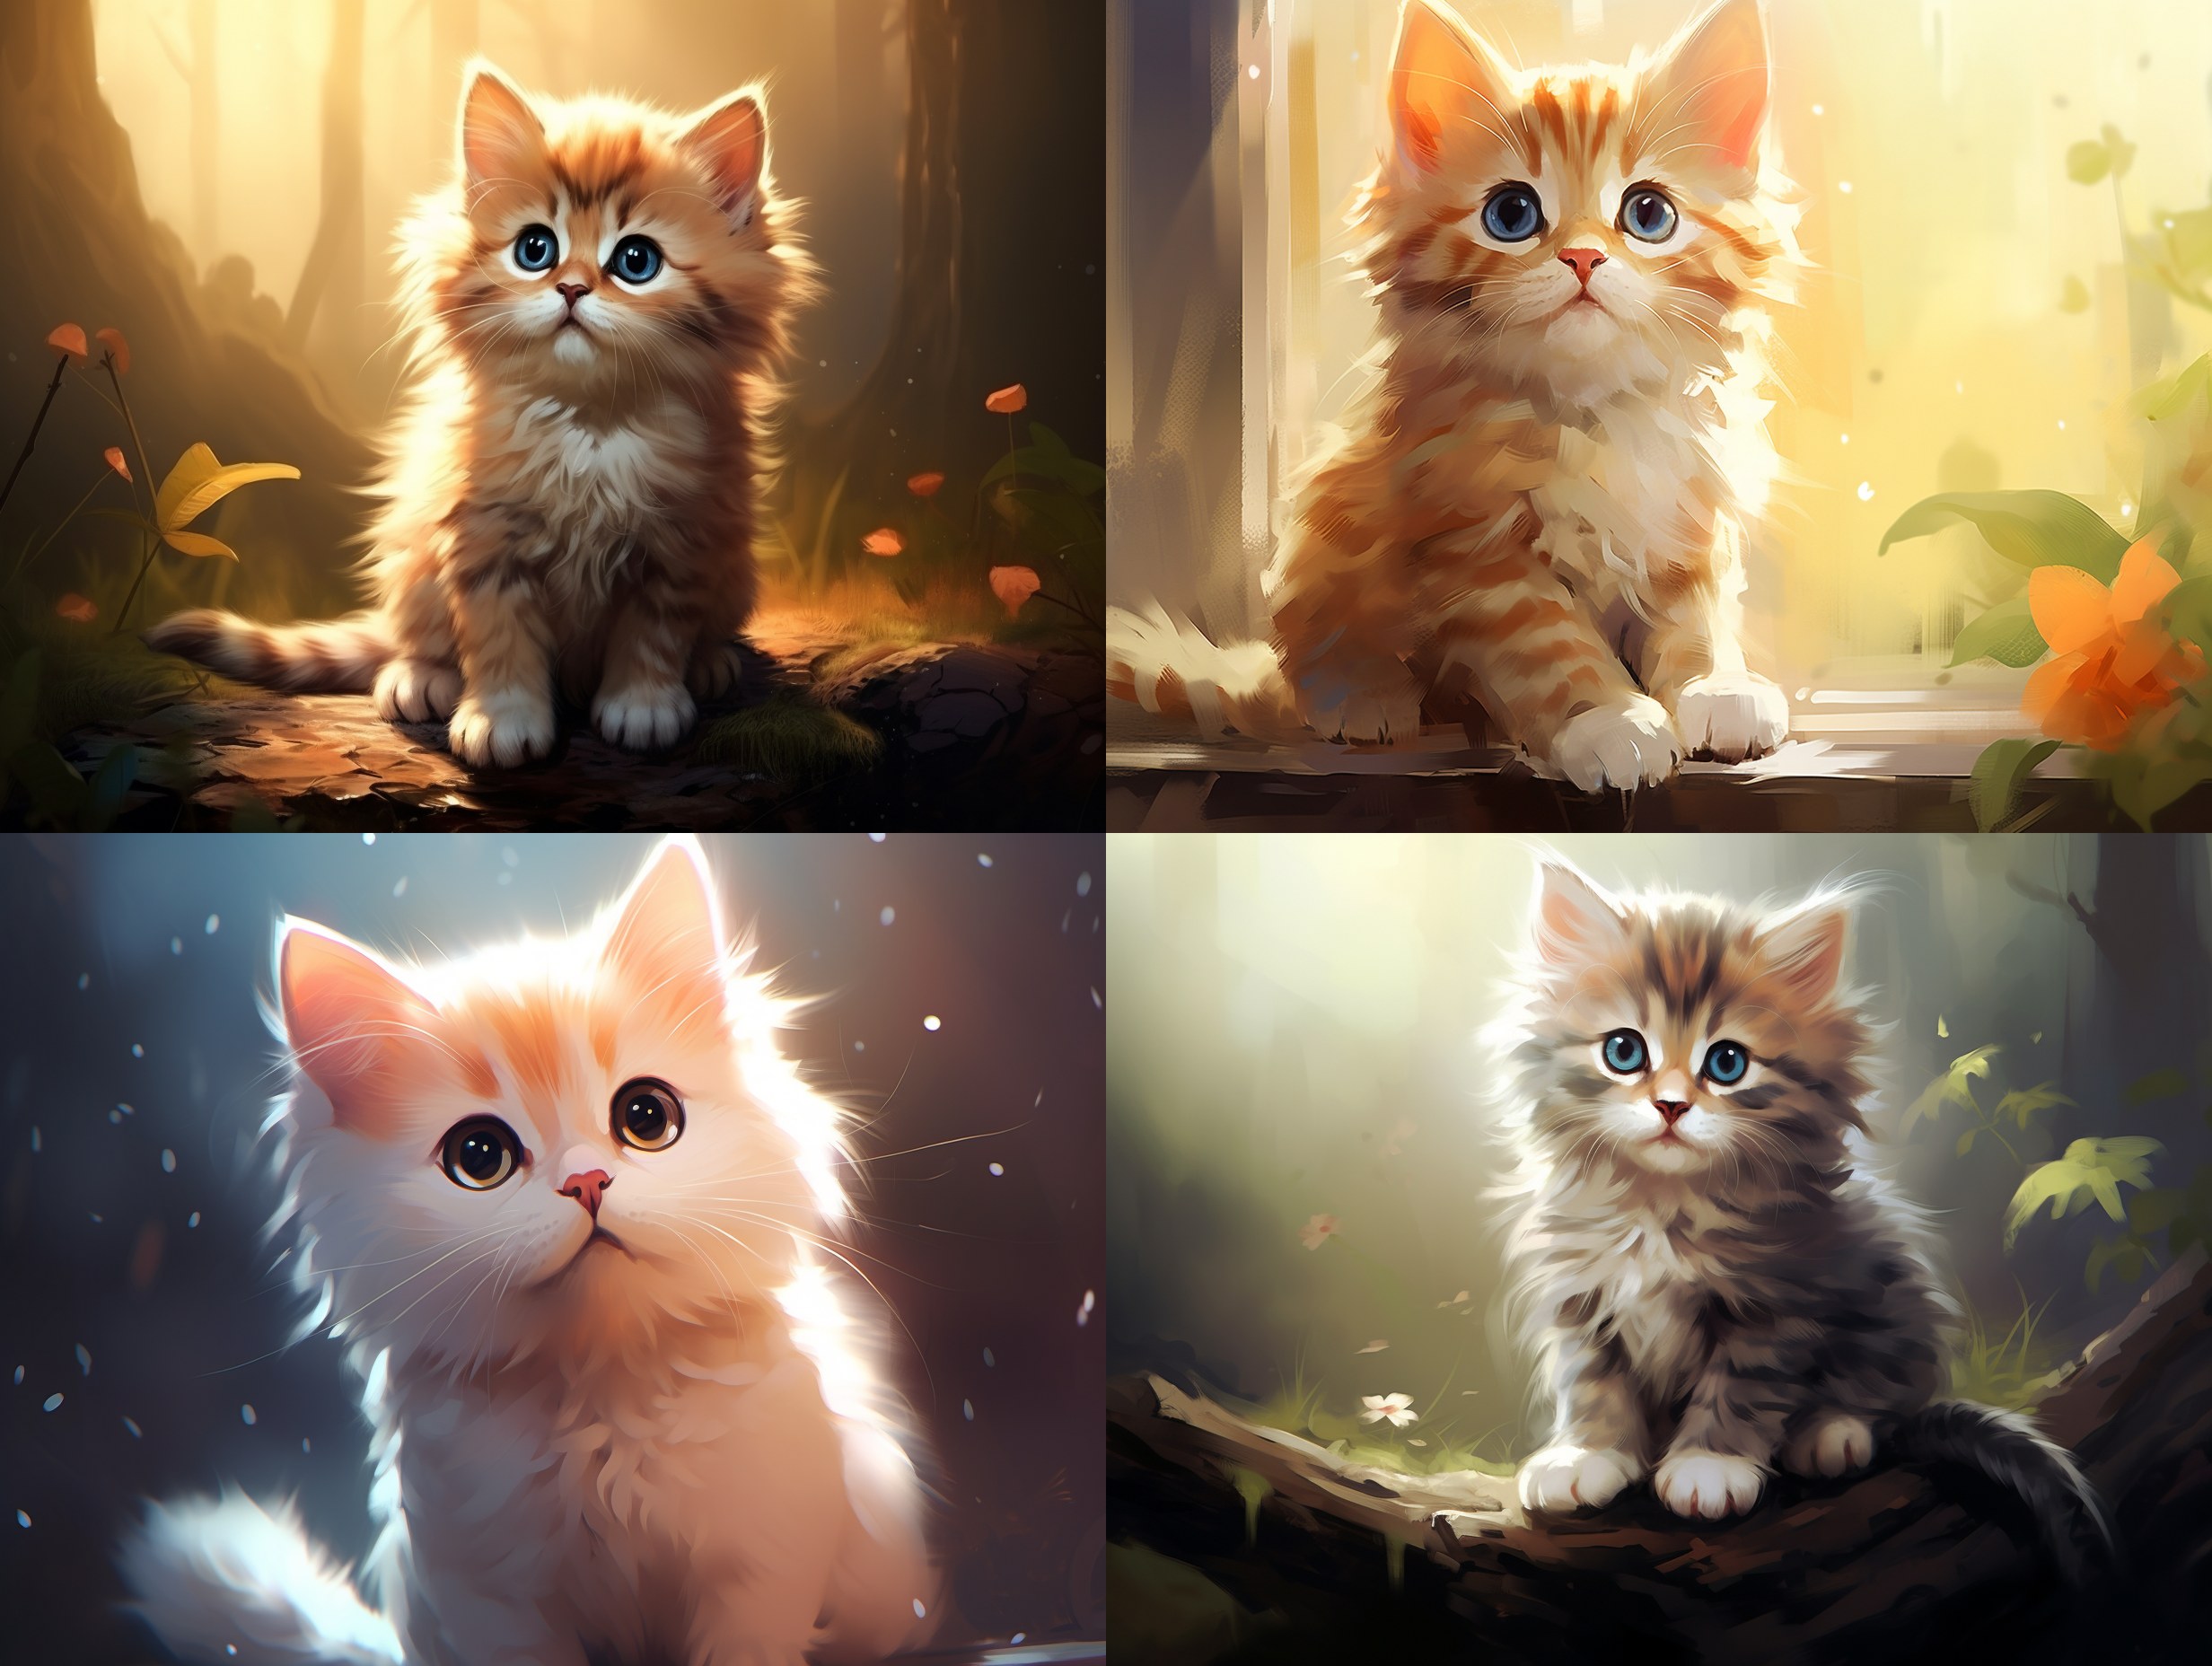

In [52]:
import requests
from PIL import Image
from IPython.display import display

endpoint = "https://api.midjourneyapi.xyz/mj/v2/fetch"

data = {
    "task_id": task_id
}

response = requests.post(endpoint, json=data)

if response.status_code == 200:
    json_response = response.json()
    
    # Access the image URL from the response
    image_url = json_response["task_result"]["image_url"]

    # Download and display the image
    image_response = requests.get(image_url)
    if image_response.status_code == 200:
        img = Image.open(BytesIO(image_response.content))
        display(img)
    else:
        print("Failed to download image.")
else:
    print("Request failed with status code:", response.status_code)
